#Thêm thư viện

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#Tiền xử lý
from scipy.io import arff
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#Đánh giá
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Mô hình
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay


#Đọc dataset

In [56]:
df = pd.read_excel("Obesity_Dataset.xlsx")

In [57]:
df.head(374)

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2,54,169,2,2,2,1,2,2,2,1,4,1,1,3
370,2,54,174,2,1,1,3,3,2,2,1,4,1,1,3
371,1,18,174,2,2,1,2,3,2,2,2,1,1,4,2
372,1,19,172,2,2,3,1,3,2,3,2,3,2,4,2


In [58]:
df['Class'].unique()

array([2, 3, 4, 1])

#Phân tích dữ liệu



## EDA - Check Columns

In [59]:
df.columns

Index(['Sex', 'Age', 'Height', 'Overweight_Obese_Family',
       'Consumption_of_Fast_Food', 'Frequency_of_Consuming_Vegetables',
       'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals', 'Smoking',
       'Liquid_Intake_Daily', 'Calculation_of_Calorie_Intake',
       'Physical_Excercise', 'Schedule_Dedicated_to_Technology',
       'Type_of_Transportation_Used', 'Class'],
      dtype='object')

In [60]:
df_2 = df.copy(deep = True)

In [61]:
df_2.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [62]:
df_2['Class'] = df_2['Class'].replace({1: 'Underweight', 2: 'Normal', 3: 'Overweight', 4: 'Obesity'})

##EDA - Columns vs Class Distribution:

##Phân phối của một số thuộc tính

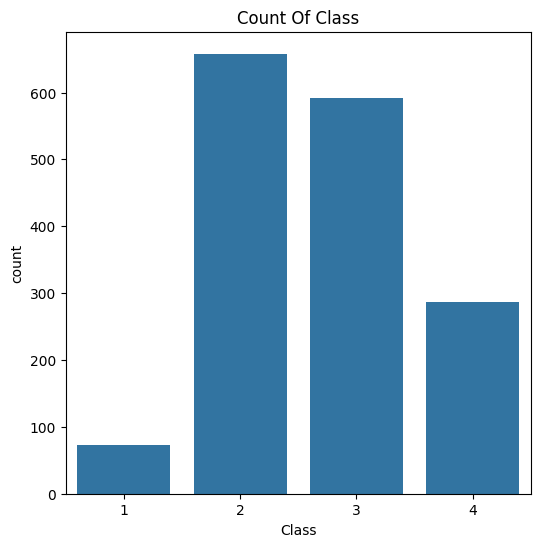

In [63]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df,x='Class')
plt.title("Count Of Class")
plt.show()


###1. Sex vs Class Distribution

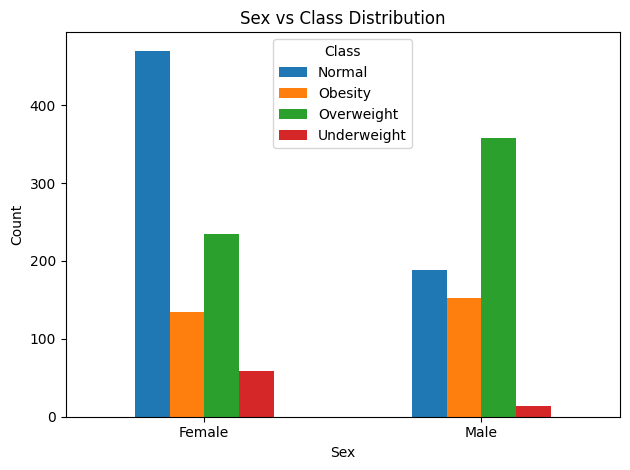

In [64]:
df_2['Sex'] = df_2['Sex'].replace({1: 'Male', 2: 'Female'})
sex_class_counts = pd.crosstab(df_2['Sex'], df_2['Class'])
sex_class_counts.plot(kind='bar', stacked=False)
plt.title('Sex vs Class Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

###2. Age vs Class Distribution

In [65]:
df_2.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,Female,18,155,2,2,3,1,3,2,1,2,3,3,4,Normal
1,Female,18,158,2,2,3,1,1,2,1,2,1,3,3,Normal
2,Female,18,159,2,2,2,1,3,2,3,2,2,3,4,Normal
3,Female,18,162,2,2,2,2,2,2,2,2,1,3,4,Normal
4,Female,18,165,2,1,2,1,3,2,1,2,3,3,2,Normal


In [66]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

df_2['Age Group'] = pd.cut(df_2['Age'], bins=age_bins, labels=age_labels)

# print(df_2)

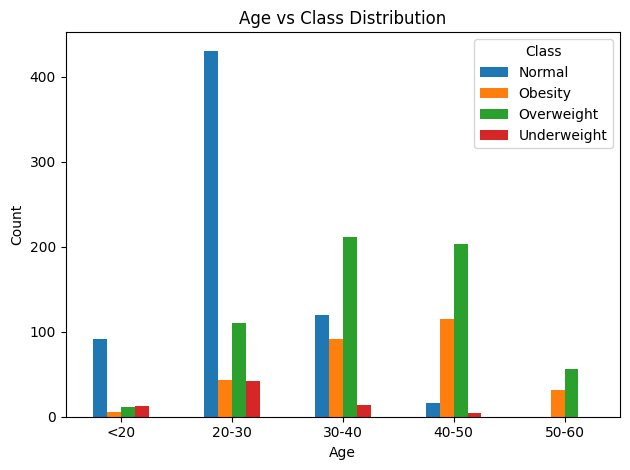

In [67]:
age_class_counts = pd.crosstab(df_2['Age Group'], df_2['Class'])
age_class_counts.plot(kind='bar', stacked=False)
plt.title('Age vs Class Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

###3. Height vs Class Distribution

In [68]:
print(df_2['Height'].unique())
print(df_2['Height'].max())
print(df_2['Height'].min())

[155 158 159 162 165 176 152 163 166 181 153 156 157 160 161 164 168 169
 171 175 177 178 174 170 167 172 173 151 154 179 182 186 180 184 183 187
 191 185 188 150 190 193]
193
150


In [69]:
ht_bins = [0, 50, 100, 150, 200, 250, 300]
ht_labels = ['<50', '50-100', '100-150', '150-200', '200-250', '250+']

df_2['Height Group'] = pd.cut(df_2['Height'], bins=ht_bins, labels=ht_labels)

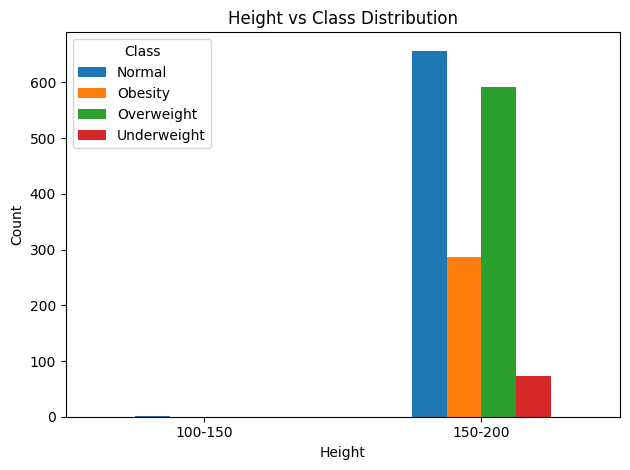

In [70]:
ht_class_counts = pd.crosstab(df_2['Height Group'], df_2['Class'])


ht_class_counts.plot(kind='bar', stacked=False)

plt.title('Height vs Class Distribution')
plt.xlabel('Height')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

###4. Overweight Obese Family vs Class Distribution

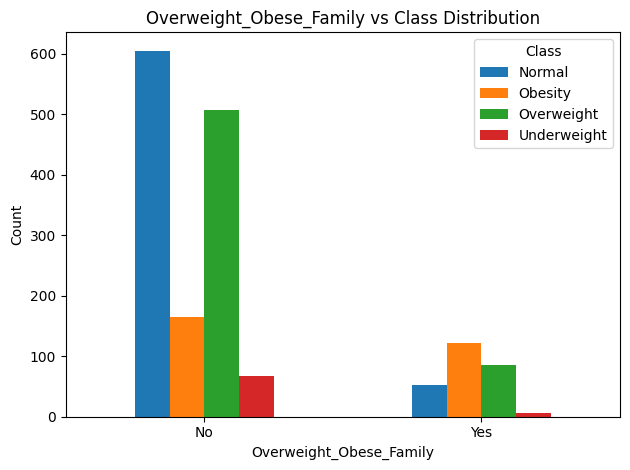

In [71]:
df_2['Overweight_Obese_Family'] = df_2['Overweight_Obese_Family'].replace({1: 'Yes', 2: 'No'})
fam_class_counts = pd.crosstab(df_2['Overweight_Obese_Family'], df_2['Class'])
fam_class_counts.plot(kind='bar', stacked=False)
plt.title('Overweight_Obese_Family vs Class Distribution')
plt.xlabel('Overweight_Obese_Family')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

###5. Consumption of Fast Food vs Class Distribution

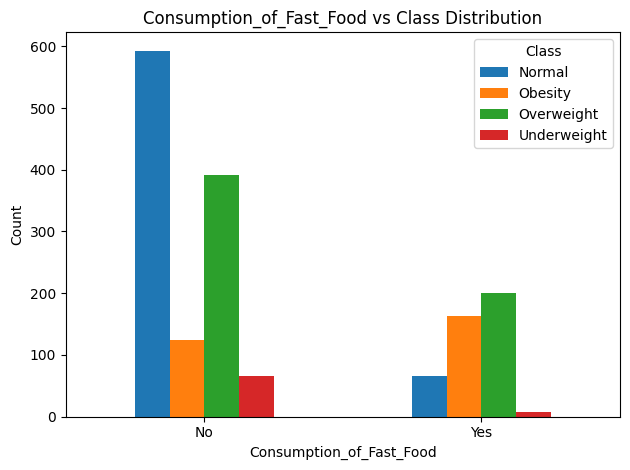

In [72]:
df_2['Consumption_of_Fast_Food'] = df_2['Consumption_of_Fast_Food'].replace({1: 'Yes', 2: 'No'})
fam_class_counts = pd.crosstab(df_2['Consumption_of_Fast_Food'], df_2['Class'])
fam_class_counts.plot(kind='bar', stacked=False)
plt.title('Consumption_of_Fast_Food vs Class Distribution')
plt.xlabel('Consumption_of_Fast_Food')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

###6. Frequency of Consuming Vegetables vs Class Distribution

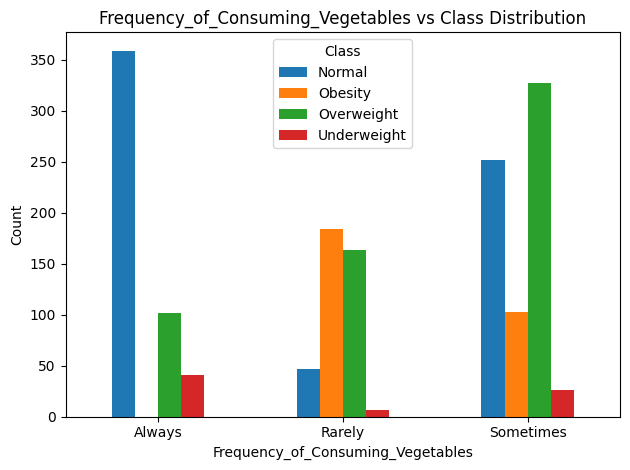

In [73]:
df_2['Frequency_of_Consuming_Vegetables'] = df_2['Frequency_of_Consuming_Vegetables'].replace({1: 'Rarely', 2: 'Sometimes', 3: 'Always'})
fam_class_counts = pd.crosstab(df_2['Frequency_of_Consuming_Vegetables'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Frequency_of_Consuming_Vegetables vs Class Distribution')
plt.xlabel('Frequency_of_Consuming_Vegetables')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

###7. Number of Main Meals Daily vs Class Distribution

In [74]:
df_2['Number_of_Main_Meals_Daily']

,Number_of_Main_Meals_Daily
0,1
1,1
2,1
3,2
4,1
...,...
1605,3
1606,2
1607,3
1608,3


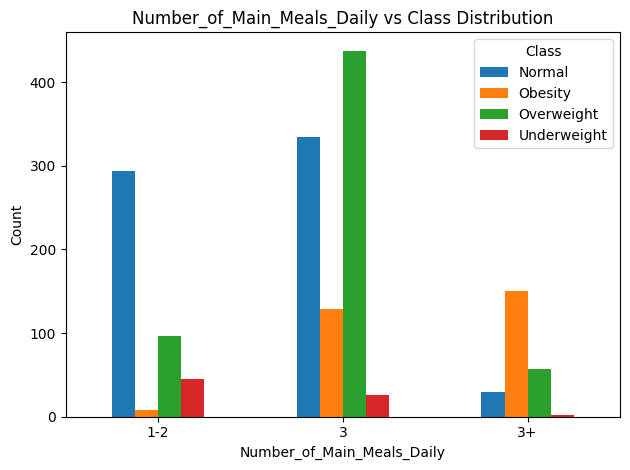

In [75]:
df_2['Number_of_Main_Meals_Daily'] = df_2['Number_of_Main_Meals_Daily'].replace({1: '1-2', 2: '3', 3: '3+'})
fam_class_counts = pd.crosstab(df_2['Number_of_Main_Meals_Daily'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Number_of_Main_Meals_Daily vs Class Distribution')
plt.xlabel('Number_of_Main_Meals_Daily')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

In [76]:
df["Sex"] = df["Sex"].apply(lambda x : 0 if x == 1 else 1)

###8. Food Intake Between Meals vs Class Distribution

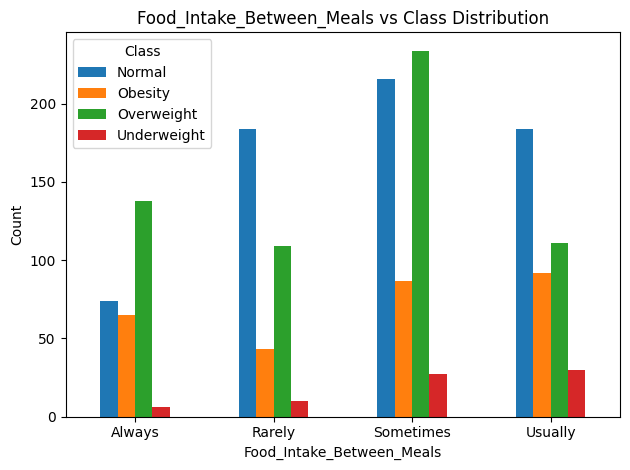

In [77]:
df_2['Food_Intake_Between_Meals'] = df_2['Food_Intake_Between_Meals'].replace({1: 'Rarely', 2: 'Sometimes', 3: 'Usually', 4:'Always'})
fam_class_counts = pd.crosstab(df_2['Food_Intake_Between_Meals'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Food_Intake_Between_Meals vs Class Distribution')
plt.xlabel('Food_Intake_Between_Meals')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

###9. Smoking vs Class Distribution

In [78]:
df_2['Smoking']

,Smoking
0,2
1,2
2,2
3,2
4,2
...,...
1605,1
1606,2
1607,1
1608,1


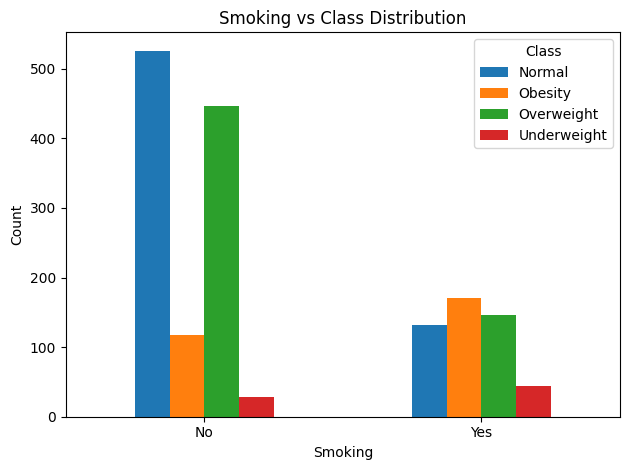

In [79]:
df_2['Smoking'] = df_2['Smoking'].replace({1: 'Yes', 2: 'No'})
fam_class_counts = pd.crosstab(df_2['Smoking'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Smoking vs Class Distribution')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

###10. Liquid Intake Daily vs Class Distribution

In [80]:
df_2['Liquid_Intake_Daily'].unique()

array([1, 3, 2])

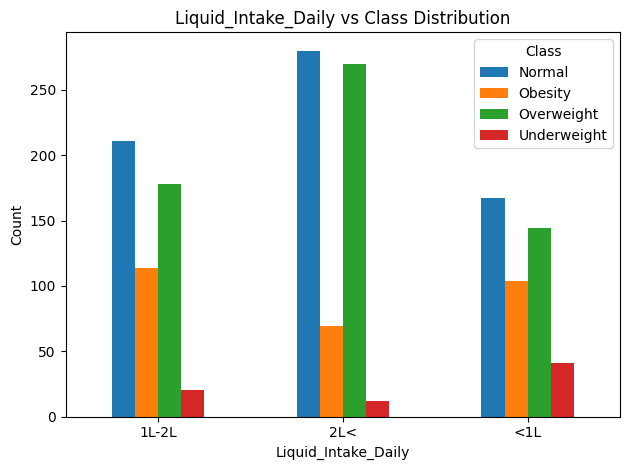

In [81]:
df_2['Liquid_Intake_Daily'] = df_2['Liquid_Intake_Daily'].replace({1: '<1L', 2: '1L-2L', 3:'2L<'})
fam_class_counts = pd.crosstab(df_2['Liquid_Intake_Daily'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Liquid_Intake_Daily vs Class Distribution')
plt.xlabel('Liquid_Intake_Daily')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

###11. Calculation of Calorie Intake vs Class Distribution

In [82]:
df_2['Calculation_of_Calorie_Intake']

,Calculation_of_Calorie_Intake
0,2
1,2
2,2
3,2
4,2
...,...
1605,1
1606,2
1607,1
1608,2


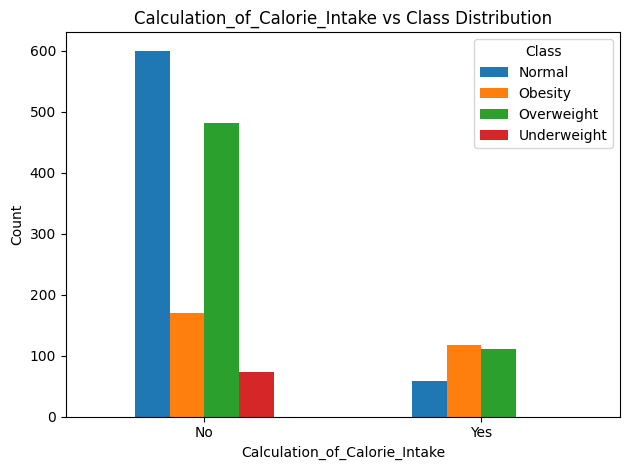

In [83]:
df_2['Calculation_of_Calorie_Intake'] = df_2['Calculation_of_Calorie_Intake'].replace({1: 'Yes', 2: 'No'})
fam_class_counts = pd.crosstab(df_2['Calculation_of_Calorie_Intake'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Calculation_of_Calorie_Intake vs Class Distribution')
plt.xlabel('Calculation_of_Calorie_Intake')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

###12. Physical Excercise vs Class Distribution

In [84]:
df_2['Physical_Excercise']

,Physical_Excercise
0,3
1,1
2,2
3,1
4,3
...,...
1605,3
1606,5
1607,4
1608,2


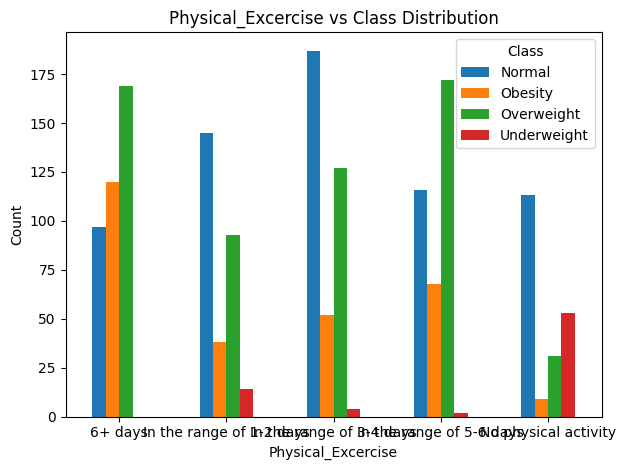

In [85]:
df_2['Physical_Excercise'] = df_2['Physical_Excercise'].replace({1: 'No physical activity', 2: 'In the range of 1-2 days', 3: 'In the range of 3-4 days', 4:'In the range of 5-6 days', 5:'6+ days'})
fam_class_counts = pd.crosstab(df_2['Physical_Excercise'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Physical_Excercise vs Class Distribution')
plt.xlabel('Physical_Excercise')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

###13. Schedule Dedicated to Technology vs Class Distribution

In [86]:
df_2['Schedule_Dedicated_to_Technology']

,Schedule_Dedicated_to_Technology
0,3
1,3
2,3
3,3
4,3
...,...
1605,1
1606,1
1607,1
1608,1


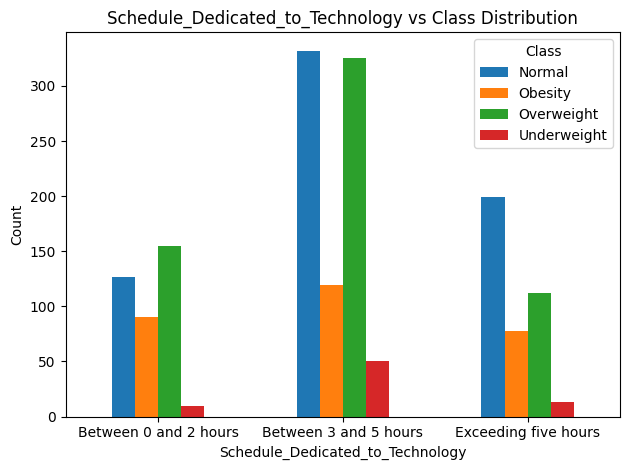

In [87]:
df_2['Schedule_Dedicated_to_Technology'] = df_2['Schedule_Dedicated_to_Technology'].replace({1: 'Between 0 and 2 hours', 2: 'Between 3 and 5 hours', 3: 'Exceeding five hours'})
fam_class_counts = pd.crosstab(df_2['Schedule_Dedicated_to_Technology'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Schedule_Dedicated_to_Technology vs Class Distribution')
plt.xlabel('Schedule_Dedicated_to_Technology')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

###14. Type of Transportation Used vs Class Distribution

In [88]:
df_2['Type_of_Transportation_Used']

,Type_of_Transportation_Used
0,4
1,3
2,4
3,4
4,2
...,...
1605,1
1606,1
1607,1
1608,1


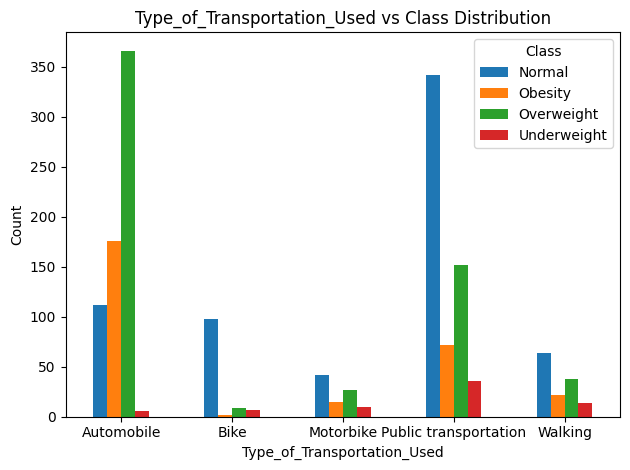

In [89]:
df_2['Type_of_Transportation_Used']= df_2['Type_of_Transportation_Used'].replace({1: 'Automobile', 2: 'Motorbike', 3: 'Bike', 4: 'Public transportation', 5:'Walking'})
fam_class_counts = pd.crosstab(df_2['Type_of_Transportation_Used'], df_2['Class'])


fam_class_counts.plot(kind='bar', stacked=False)

plt.title('Type_of_Transportation_Used vs Class Distribution')
plt.xlabel('Type_of_Transportation_Used')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

In [90]:
df.select_dtypes(include=['number'])

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,1,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,1,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,1,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,1,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,1,18,165,2,1,2,1,3,2,1,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1,51,165,2,1,1,3,4,1,3,1,3,1,1,4
1606,1,51,163,2,1,2,2,4,2,2,2,5,1,1,4
1607,1,52,162,1,2,1,3,4,1,3,1,4,1,1,4
1608,1,53,168,2,1,1,3,4,1,2,2,2,1,1,4


#Phân chia dữ liệu

##Xác định các cột đặc trưng và mục tiêu

In [91]:
# Xác định các cột đặc trưng và mục tiêu
X = df.drop(columns=['Class'])
y = df['Class']

##Chia tập dữ liệu thành tập huấn luyện và kiểm thử

In [92]:
# Chia tập dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Tiền xử lý dữ liệu

In [93]:
#Áp dụng chuẩn hóa
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train)

[[-1.13478819  1.12365772  0.80230104 ... -1.71817524 -1.48282701
  -1.1255007 ]
 [-1.13478819  1.63343974  1.17675341 ...  0.54847861  1.40437056
  -1.1255007 ]
 [ 0.88122172 -0.71155754 -0.82032592 ... -0.96262396 -0.03922823
  -0.46597163]
 ...
 [ 0.88122172 -1.22133956 -0.69550846 ... -1.71817524  1.40437056
   0.19355745]
 [-1.13478819 -0.50764473  1.42638833 ...  1.3040299  -1.48282701
   0.85308652]
 [ 0.88122172  1.22561413 -0.94514338 ...  1.3040299   1.40437056
  -1.1255007 ]]


#Huấn luyện, đánh giá mô hình Dummy Classifier và SVC

## Huấn luyện và đánh giá Dummy Classifier

In [94]:
# Huấn luyện Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_model = dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

In [95]:
# Đánh giá Dummy Classifier
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy, average='macro', zero_division = 0)  # or 'micro', 'weighted'
recall_dummy = recall_score(y_test, y_pred_dummy, average='macro', zero_division = 0)        # or 'micro', 'weighted'
f1_dummy = f1_score(y_test, y_pred_dummy, average='macro', zero_division = 0)

# In ra đánh giá
dummy_df = pd.DataFrame({
    'Dummy Classifier': [accuracy_dummy, precision_dummy, recall_dummy, f1_dummy]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print(dummy_df)

           Dummy Classifier
Accuracy           0.388199
Precision          0.097050
Recall             0.250000
F1-score           0.139821


## Huấn luyện và đánh giá SVC

In [96]:
# Huấn luyện SVC
svc_clf = SVC(kernel='rbf', random_state=42)
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)

In [97]:
# Đánh giá SVC
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='macro', zero_division = 0)  # or 'micro', 'weighted'
recall_svc = recall_score(y_test, y_pred_svc, average='macro', zero_division = 0)        # or 'micro', 'weighted'
f1_svc = f1_score(y_test, y_pred_svc, average='macro', zero_division = 0)

# In ra đánh giá
svc_df = pd.DataFrame({
    'SVC': [accuracy_svc, precision_svc, recall_svc, f1_svc]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print(svc_df)

                SVC
Accuracy   0.773292
Precision  0.810700
Recall     0.695836
F1-score   0.727726



Ma trận nhầm lẫn:


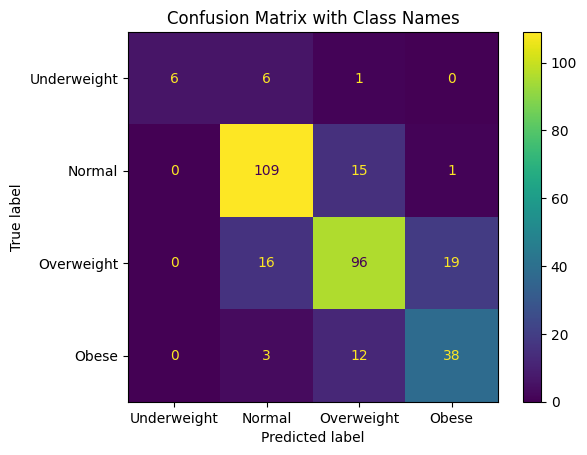

In [98]:
# Ma trận nhầm lẫn
print("\nMa trận nhầm lẫn:")

# Vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_svc)

labels = ["Underweight", "Normal", "Overweight", "Obese"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.viridis, ax=ax, colorbar=True)
plt.grid(False)  # Tắt lưới
plt.title("Confusion Matrix with Class Names")
plt.show()

### Dùng grid_search để tăng accuracy

In [99]:
# Xác định siêu tham số
param_grid = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001],
              'kernel':['rbf']}

In [100]:
# Khởi tạo GridSearchCV
grid_search =  GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [101]:
# Huấn luyện GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=2)

In [102]:
# Lưu GridSearchCV
joblib.dump(grid_search, 'svm_grid_search.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [103]:
# Kết quả tốt nhất
print("Các siêu tham số tốt nhất:")
print(grid_search.best_params_)

Các siêu tham số tốt nhất:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [104]:
#Đánh giá trên tập kiểm tra
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred)
precision_svc = precision_score(y_test, y_pred, average='macro', zero_division = 0)  # or 'micro', 'weighted'
recall_svc = recall_score(y_test, y_pred, average='macro', zero_division = 0)        # or 'micro', 'weighted'
f1_svc = f1_score(y_test, y_pred, average='macro', zero_division = 0)

# In ra đánh giá
svc_df = pd.DataFrame({
    'SVC': [accuracy_svc, precision_svc, recall_svc, f1_svc]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print(svc_df)


                SVC
Accuracy   0.791925
Precision  0.762252
Recall     0.827797
F1-score   0.788890



Ma trận nhầm lẫn:


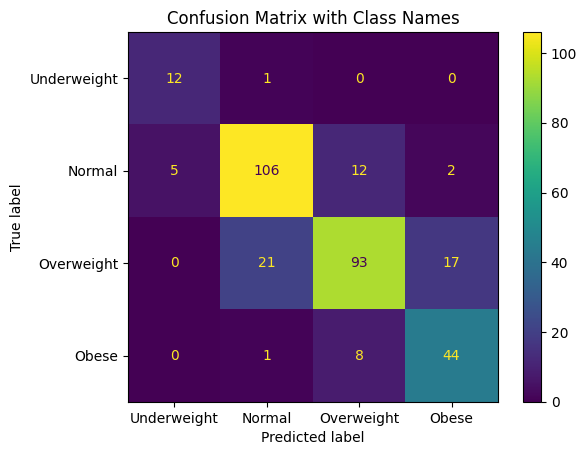

In [105]:
# Ma trận nhầm lẫn
print("\nMa trận nhầm lẫn:")

# Vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

labels = ["Underweight", "Normal", "Overweight", "Obese"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.viridis, ax=ax, colorbar=True)
plt.grid(False)  # Tắt lưới
plt.title("Confusion Matrix with Class Names")
plt.show()